# 이동평균과 표준편차를 사용한 이상치 탐지 실습

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
pd.set_option('display.max_rows', 500)

#시계열 데이터 생성
dataes = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.rand(500)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dataes,
    'Value' : values
})

### 이동평균과 이동 표준편차 계산

In [19]:
window_size = 7
data['MovingAverage'] = data['Value']. rolling(window= window_size).mean()
data['MovingStd'] =data['Value']. rolling(window= window_size).std()

print(data['MovingAverage'])
print(data['MovingStd'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.676974
7      0.635911
8      0.569891
9      0.541107
10     0.526987
11     0.490177
12     0.374505
13     0.382101
14     0.395873
15     0.468868
16     0.552758
17     0.540270
18     0.647180
19     0.646012
20     0.521485
21     0.476672
22     0.384967
23     0.336169
24     0.431888
25     0.310385
26     0.413983
27     0.452170
28     0.465067
29     0.496297
30     0.518646
31     0.505674
32     0.522169
33     0.484238
34     0.519748
35     0.569465
36     0.553874
37     0.481151
38     0.489564
39     0.483768
40     0.450710
41     0.468193
42     0.501160
43     0.505726
44     0.573361
45     0.493883
46     0.536432
47     0.561564
48     0.483858
49     0.371959
50     0.378455
51     0.415623
52     0.405269
53     0.447017
54     0.491342
55     0.493185
56     0.584406
57     0.628824
58     0.608569
59     0.701144
60     0.634206
61     0.649826
62     0

#### 임계값 설정, 이상치 탐지

In [20]:
Threshold_multiplier = 2 #임계값 계수
data['Threshold'] = data['MovingAverage'] + Threshold_multiplier * data['MovingStd']

#print(data['Threahold'])

# 이상치탐지 -> 임계값을 초과하는 경우 True(이상치)로 설정합니다.
data['Outlier'] = data['Value'] > data['Threshold']
print(data['Outlier'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

### 시각화

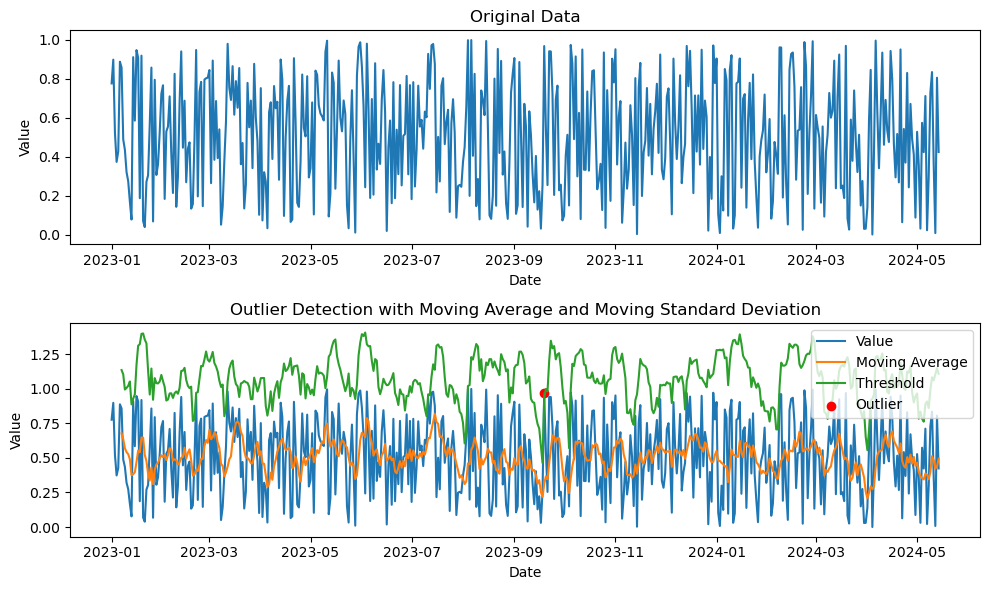

In [21]:
# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')

# 이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')
plt.legend()

 

plt.tight_layout()


plt.show()